In [8]:
import pandas as pd
import numpy as np
import os

Import Numpy and Pandas libraries for reading csv files and to perform analysis



In [48]:
df = pd.read_csv('./Data.csv', encoding='latin1')
df.head()

,Year,Province,Use of Funds,Expenditure by Provincial/Territorial Government,Expenditure by Public Government,Total Expenditure,"Critical Illness rate (per 10,000 population)",Life Expectancy
0,2003,Newfoundland and Labrador,Hospitals,"68,43,18,242","69,82,79,170","1,38,25,97,412",378,78.27
1,2004,Newfoundland and Labrador,Hospitals,"69,71,08,279","70,97,76,261","1,40,68,84,540",400,78.33
2,2005,Newfoundland and Labrador,Hospitals,"74,45,10,268","75,80,10,196","1,50,25,20,464",454,78.26
3,2006,Newfoundland and Labrador,Hospitals,"82,09,71,113","83,47,71,073","1,65,57,42,185",550.3,78.25
4,2007,Newfoundland and Labrador,Hospitals,"87,55,74,135","88,86,27,738","1,76,42,01,874",575.6,78.18


Reads the CSV Data.csv into a pandas DataFrame called df, which stores the data in a table format

In [49]:
df.shape

(2457, 8)

The df.shape function returns the dimensions of the DataFrame, showing the number of rows and columns as a tuple.(2457, 8) means the DataFrame has 2457 rows and 8 columns

In [50]:
df.isnull().sum()

Year                                                0
Province                                            0
Use of Funds                                        0
Expenditure by Provincial/Territorial Government    0
Expenditure by Public Government                    0
Total Expenditure                                   0
Critical Illness rate (per 10,000 population)       0
Life Expectancy                                     0
dtype: int64

df.isnull().sum() shows the number of missing (NaN) values in each column of the DataFrame

In [51]:
print(df.head())

   Year                   Province Use of Funds  \
0  2003  Newfoundland and Labrador    Hospitals   
1  2004  Newfoundland and Labrador    Hospitals   
2  2005  Newfoundland and Labrador    Hospitals   
3  2006  Newfoundland and Labrador    Hospitals   
4  2007  Newfoundland and Labrador    Hospitals   

  Expenditure by Provincial/Territorial Government  \
0                                     68,43,18,242   
1                                     69,71,08,279   
2                                     74,45,10,268   
3                                     82,09,71,113   
4                                     87,55,74,135   

  Expenditure by Public Government Total Expenditure  \
0                     69,82,79,170    1,38,25,97,412   
1                     70,97,76,261    1,40,68,84,540   
2                     75,80,10,196    1,50,25,20,464   
3                     83,47,71,073    1,65,57,42,185   
4                     88,86,27,738    1,76,42,01,874   

  Critical Illness rate (per 10

In [62]:
df['Expenditure by Provincial/Territorial Government'] = df['Expenditure by Provincial/Territorial Government'].str.replace(',', '')
df['Expenditure by Public Government'] = df['Expenditure by Public Government'].str.replace(',', '')
df['Total Expenditure'] = df['Total Expenditure'].str.replace(',', '')


AttributeError: Can only use .str accessor with string values!

Replacing commas with empty strings to clean up the data

In [55]:
df['Expenditure by Provincial/Territorial Government'] = pd.to_numeric(df['Expenditure by Provincial/Territorial Government'], errors='coerce')
df['Expenditure by Public Government'] = pd.to_numeric(df['Expenditure by Public Government'], errors='coerce')
df['Total Expenditure'] = pd.to_numeric(df['Total Expenditure'], errors='coerce')

Converting to float, coercing errors to NaN

In [56]:
df['Expenditure by Provincial/Territorial Government'] = df['Expenditure by Provincial/Territorial Government'].astype('Int64')
df['Expenditure by Public Government'] = df['Expenditure by Public Government'].astype('Int64')
df['Total Expenditure'] = df['Total Expenditure'].astype('Int64')

Converting the features to Int data type

In [58]:
print(df.head())

   Year                   Province Use of Funds  \
0  2003  Newfoundland and Labrador    Hospitals   
1  2004  Newfoundland and Labrador    Hospitals   
2  2005  Newfoundland and Labrador    Hospitals   
3  2006  Newfoundland and Labrador    Hospitals   
4  2007  Newfoundland and Labrador    Hospitals   

   Expenditure by Provincial/Territorial Government  \
0                                         684318242   
1                                         697108279   
2                                         744510268   
3                                         820971113   
4                                         875574135   

   Expenditure by Public Government  Total Expenditure  \
0                         698279170         1382597412   
1                         709776261         1406884540   
2                         758010196         1502520464   
3                         834771073         1655742185   
4                         888627738         1764201874   

  Critical Il

In [59]:
print(df.describe())

              Year  Expenditure by Provincial/Territorial Government  \
count  2457.000000                                      2.224000e+03   
mean   2013.000000                                      2.441026e+09   
std       6.056533                                      7.134522e+09   
min    2003.000000                                      0.000000e+00   
25%    2008.000000                                      3.772179e+07   
50%    2013.000000                                      2.505215e+08   
75%    2018.000000                                      1.412060e+09   
max    2023.000000                                      8.163793e+10   

       Expenditure by Public Government  Total Expenditure  Life Expectancy  
count                      2.223000e+03       2.457000e+03      2457.000000  
mean                       2.738032e+09       4.686808e+09        79.414176  
std                        7.700392e+09       1.418370e+10         2.849137  
min                        3.395883e+06

df.describe() provides a statistical summary of the DataFrame, including count, mean, standard deviation, minimum, maximum, and quartiles for each numeric column.

In [60]:
print(df.dtypes)

Year                                                  int64
Province                                             object
Use of Funds                                         object
Expenditure by Provincial/Territorial Government      Int64
Expenditure by Public Government                      Int64
Total Expenditure                                     Int64
Critical Illness rate (per 10,000 population)        object
Life Expectancy                                     float64
dtype: object


In [98]:
df['Critical Illness rate (per 10,000 population)'] = df['Critical Illness rate (per 10,000 population)'].str.replace(',', '')
df['Critical Illness rate (per 10,000 population)'] = pd.to_numeric(df['Critical Illness rate (per 10,000 population)'], errors='coerce')

AttributeError: Can only use .str accessor with string values!

In [68]:
df['Critical Illness rate (per 10,000 population)'] = df['Critical Illness rate (per 10,000 population)'].astype('float')

In [69]:
print(df.head())

   Year                   Province Use of Funds  \
0  2003  Newfoundland and Labrador    Hospitals   
1  2004  Newfoundland and Labrador    Hospitals   
2  2005  Newfoundland and Labrador    Hospitals   
3  2006  Newfoundland and Labrador    Hospitals   
4  2007  Newfoundland and Labrador    Hospitals   

   Expenditure by Provincial/Territorial Government  \
0                                         684318242   
1                                         697108279   
2                                         744510268   
3                                         820971113   
4                                         875574135   

   Expenditure by Public Government  Total Expenditure  \
0                         698279170         1382597412   
1                         709776261         1406884540   
2                         758010196         1502520464   
3                         834771073         1655742185   
4                         888627738         1764201874   

   Critical I

In [71]:
print(df.dtypes)

Year                                                  int64
Province                                             object
Use of Funds                                         object
Expenditure by Provincial/Territorial Government      Int64
Expenditure by Public Government                      Int64
Total Expenditure                                     Int64
Critical Illness rate (per 10,000 population)       float64
Life Expectancy                                     float64
dtype: object


In [78]:
df['Year'] = df['Year'].astype('string')

In [79]:
print(df.dtypes)

Year                                                 string
Province                                             object
Use of Funds                                         object
Expenditure by Provincial/Territorial Government      Int64
Expenditure by Public Government                      Int64
Total Expenditure                                     Int64
Critical Illness rate (per 10,000 population)       float64
Life Expectancy                                     float64
dtype: object


In [80]:
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
correlation_matrix


,Expenditure by Provincial/Territorial Government,Expenditure by Public Government,Total Expenditure,"Critical Illness rate (per 10,000 population)",Life Expectancy
Expenditure by Provincial/Territorial Government,1.000000,0.997178,0.999240,0.122254,0.247040
Expenditure by Public Government,0.997178,1.000000,0.999347,0.127411,0.256637
Total Expenditure,0.999240,0.999347,1.000000,0.119358,0.240090
"Critical Illness rate (per 10,000 population)",0.122254,0.127411,0.119358,1.000000,0.783442
Life Expectancy,0.247040,0.256637,0.240090,0.783442,1.000000


In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

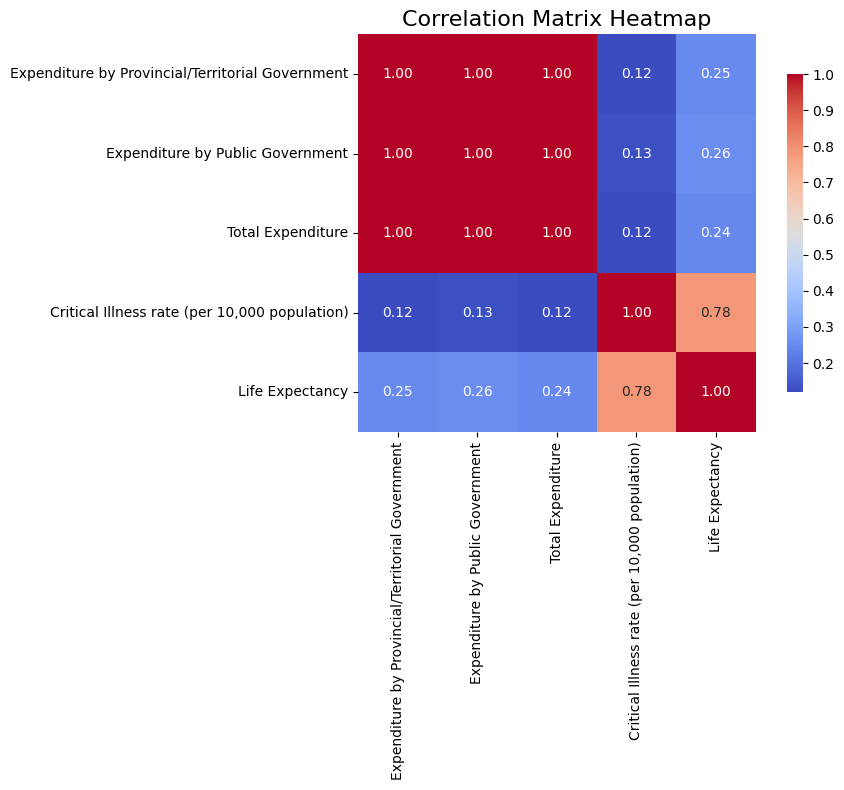

In [91]:
# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add titles and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

The correlation matrix summarizes the relationships between various variables in the dataset. One of the most notable findings is the strong positive correlations among the expenditure variables, specifically Expenditure by Provincial/Territorial Government, Expenditure by Public Government, and Total Expenditure. These variables exhibit correlation coefficients ranging from 0.997 to 1.000, indicating that as one type of expenditure increases, the others tend to increase as well. This suggests a significant interdependence among the different forms of health expenditure.

In terms of life expectancy, there is a relatively high positive correlation (0.783) between Life Expectancy and the Critical Illness Rate (per 10,000 population). This relationship implies that as the critical illness rate increases, life expectancy tends to decrease. While the correlation between life expectancy and the various expenditure variables is more moderate, with coefficients ranging from approximately 0.24 to 0.26, it still indicates that higher expenditures on health care are generally associated with higher life expectancy. However, this relationship is not particularly strong, suggesting that other factors may also play significant roles in influencing life expectancy outcomes.

The critical illness rate's correlation with life expectancy highlights a critical insight: as rates of serious health conditions rise, life expectancy correspondingly declines. This strong negative correlation aligns with intuitive understanding, as higher rates of critical illnesses can understandably lead to decreased life expectancy. Conversely, the correlations between expenditure variables and the critical illness rate are relatively weak, around 0.12, indicating that health expenditures do not significantly correlate with critical illness rates within the population.

Additionally, the extremely high correlations among the expenditure variables suggest potential collinearity, which could affect the performance of predictive models if all these variables are included in regression analysis. 

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X = df.drop(columns=['Life Expectancy'])  # Assuming 'Life Expectancy' is your target variable
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

TypeError: boolean value of NA is ambiguous

In [93]:
print(X.isnull().sum())

Year                                                  0
Province                                              0
Use of Funds                                          0
Expenditure by Provincial/Territorial Government    233
Expenditure by Public Government                    234
Total Expenditure                                     0
Critical Illness rate (per 10,000 population)         1
dtype: int64


In [94]:
X_filled = X.fillna(X.mean())

C:\Users\abc\AppData\Local\Temp\ipykernel_5416\3568717211.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_filled = X.fillna(X.mean())


TypeError: cannot safely cast non-equivalent float64 to int64

In [95]:
X_float = X.astype({col: 'float' for col in X.select_dtypes(include='integer').columns})

# Fill missing values
X_filled = X_float.fillna(X_float.mean())

# If you need to convert back to integers after filling (optional):
# X_filled = X_filled.astype({col: 'int64' for col in X.select_dtypes(include='integer').columns})

print(X_filled)

      Year                   Province Use of Funds  \
0     2003  Newfoundland and Labrador    Hospitals   
1     2004  Newfoundland and Labrador    Hospitals   
2     2005  Newfoundland and Labrador    Hospitals   
3     2006  Newfoundland and Labrador    Hospitals   
4     2007  Newfoundland and Labrador    Hospitals   
...    ...                        ...          ...   
2452  2019                    Nunavut        Total   
2453  2020                    Nunavut        Total   
2454  2021                    Nunavut        Total   
2455  2022                    Nunavut        Total   
2456  2023                    Nunavut        Total   

      Expenditure by Provincial/Territorial Government  \
0                                          684318242.0   
1                                          697108279.0   
2                                          744510268.0   
3                                          820971113.0   
4                                          875574135.0   
...

C:\Users\abc\AppData\Local\Temp\ipykernel_5416\1632332370.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_filled = X_float.fillna(X_float.mean())


In [96]:
numeric_cols = X_float.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values in numeric columns only
X_filled = X_float.copy()
X_filled[numeric_cols] = X_float[numeric_cols].fillna(X_float[numeric_cols].mean())

print(X_filled)


      Year                   Province Use of Funds  \
0     2003  Newfoundland and Labrador    Hospitals   
1     2004  Newfoundland and Labrador    Hospitals   
2     2005  Newfoundland and Labrador    Hospitals   
3     2006  Newfoundland and Labrador    Hospitals   
4     2007  Newfoundland and Labrador    Hospitals   
...    ...                        ...          ...   
2452  2019                    Nunavut        Total   
2453  2020                    Nunavut        Total   
2454  2021                    Nunavut        Total   
2455  2022                    Nunavut        Total   
2456  2023                    Nunavut        Total   

      Expenditure by Provincial/Territorial Government  \
0                                          684318242.0   
1                                          697108279.0   
2                                          744510268.0   
3                                          820971113.0   
4                                          875574135.0   
...

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only numeric columns (floats and integers)
X_numeric = X_filled.select_dtypes(include=['float64', 'int64'])

# Ensure no missing or infinite values remain (VIF needs finite numbers)
X_numeric = X_numeric.replace([np.inf, -np.inf], np.nan).dropna()

# Calculate VIF for each numeric feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

print(vif_data)

                                            Feature         VIF
0  Expenditure by Provincial/Territorial Government  222.035224
1                  Expenditure by Public Government  227.224316
2                                 Total Expenditure   95.942018
3     Critical Illness rate (per 10,000 population)    1.286744


We can see the features 'Expenditure by Provincial/Territorial Government' and 'Expenditure by Public Government  227.224316' have very high multi-colinearity that can affect the model performance


In [105]:
X_numeric_reduced = X_numeric.drop(['Expenditure by Public Government', 'Expenditure by Provincial/Territorial Government'], axis=1)

# Recalculate VIF after dropping the features
vif_data_reduced = pd.DataFrame()
vif_data_reduced['Feature'] = X_numeric_reduced.columns
vif_data_reduced['VIF'] = [variance_inflation_factor(X_numeric_reduced.values, i) for i in range(X_numeric_reduced.shape[1])]

print(vif_data_reduced)

                                         Feature       VIF
0                              Total Expenditure  1.124476
1  Critical Illness rate (per 10,000 population)  1.124476


We remove the features with high multicolinearity and compute the VIF again

#EDA

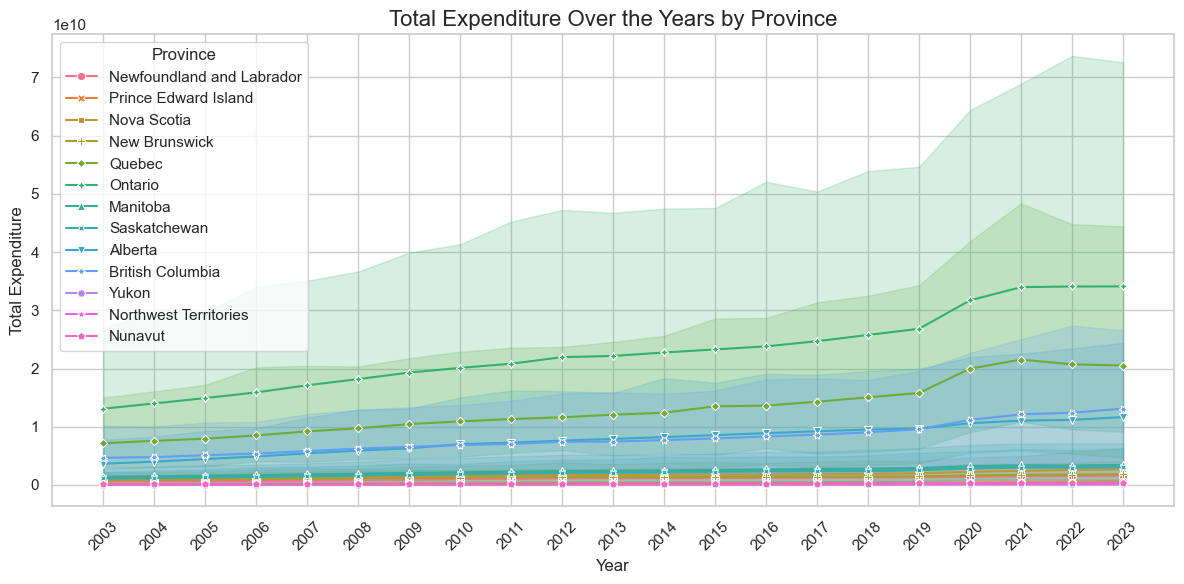

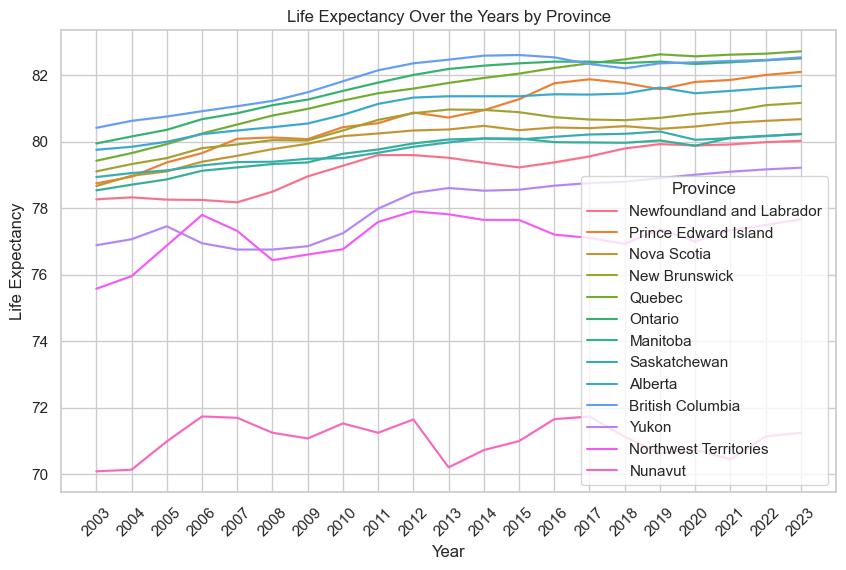

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(12, 6))

# Use lineplot with different styles and markers
sns.lineplot(data=df, x='Year', y='Total Expenditure', hue='Province', style='Province', markers=True, dashes=False)

# Set title and labels
plt.title('Total Expenditure Over the Years by Province', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Expenditure', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='Life Expectancy', hue='Province')
plt.title('Life Expectancy Over the Years by Province')
plt.xticks(rotation=45)
plt.show()

In [112]:
print(df.head())

   Year                   Province Use of Funds  \
0  2003  Newfoundland and Labrador    Hospitals   
1  2004  Newfoundland and Labrador    Hospitals   
2  2005  Newfoundland and Labrador    Hospitals   
3  2006  Newfoundland and Labrador    Hospitals   
4  2007  Newfoundland and Labrador    Hospitals   

   Expenditure by Provincial/Territorial Government  \
0                                         684318242   
1                                         697108279   
2                                         744510268   
3                                         820971113   
4                                         875574135   

   Expenditure by Public Government  Total Expenditure  \
0                         698279170         1382597412   
1                         709776261         1406884540   
2                         758010196         1502520464   
3                         834771073         1655742185   
4                         888627738         1764201874   

   Critical I

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 1: Select relevant columns
df_reg = df[['Total Expenditure', 'Life Expectancy']]

# Step 2: Scale the data (optional)
scaler = StandardScaler()
df_reg['Total Expenditure Scaled'] = scaler.fit_transform(df_reg[['Total Expenditure']])

# Step 3: Define X (features) and y (target)
X = df_reg[['Total Expenditure Scaled']]
y = df_reg['Life Expectancy']

# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Fit the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = regressor.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optional: Visualize actual vs predicted
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.show()

In [124]:
print(X.isnull().sum())

Total Expenditure                                     0
Expenditure by Provincial/Territorial Government    233
Expenditure by Public Government                    234
Critical Illness rate (per 10,000 population)         1
dtype: int64


In [125]:
# Drop rows with missing values
X_cleaned = X.dropna()

# Ensure target variable aligns with cleaned features
y_cleaned = y[X_cleaned.index]

In [126]:
from sklearn.impute import SimpleImputer

# Fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform X
X_imputed = imputer.fit_transform(X)

In [127]:
# Scaling (optional)
X_scaled = scaler.fit_transform(X_imputed)  # or X_cleaned if you dropped rows

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the model and evaluate
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Recalculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression with More Features - MSE: {mse}, R-squared: {r2}")

Linear Regression with More Features - MSE: 2.945639132078583, R-squared: 0.6322886759205993


In [130]:
# Create a DataFrame to hold the actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

results['Residual'] = results['Actual'] - results['Predicted']

# Display the results
print(results)

print(results.head())  # Show the first 5 rows

      Actual  Predicted  Residual
719    80.05  79.186080  0.863920
785    81.46  79.702992  1.757008
1606   81.37  79.324732  2.045268
867    80.99  79.229397  1.760603
1084   82.41  79.576257  2.833743
...      ...        ...       ...
1960   77.25  79.187087 -1.937087
457    80.39  79.217613  1.172387
1995   76.89  79.186469 -2.296469
1752   82.36  79.207969  3.152031
940    82.63  83.088392 -0.458392

[492 rows x 3 columns]
      Actual  Predicted  Residual
719    80.05  79.186080  0.863920
785    81.46  79.702992  1.757008
1606   81.37  79.324732  2.045268
867    80.99  79.229397  1.760603
1084   82.41  79.576257  2.833743


#######Decision Trees

In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import tree

In [134]:
X = X.astype(float)

In [135]:
X_imputed = X.fillna(X.mean()) 

In [136]:
y = df['Life Expectancy']  # Ensure this is also of compatible type

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [137]:
regressor = DecisionTreeRegressor(random_state=42)

# Fit the model
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [138]:
y_pred = regressor.predict(X_test)

In [139]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree Regression - MSE: {mse}, R-squared: {r2}")

Decision Tree Regression - MSE: 0.6351471544715446, R-squared: 0.9207130301154063


*****************************************************************************************************

In [144]:
X = df[['Total Expenditure', 
         'Expenditure by Provincial/Territorial Government', 
         'Expenditure by Public Government', 
         'Critical Illness rate (per 10,000 population)']]
         
y = df['Life Expectancy']

In [145]:
df = pd.get_dummies(df, columns=['Province'], drop_first=True)

In [146]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)